<a href="https://colab.research.google.com/github/sku1978/sk-share-repo/blob/main/ML/Decision-Trees-and-Random-Forests/Decision%20Tree%20Algorithms%20for%20Loan%20Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

%matplotlib inline

## **Read data**

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/sku1978/sk-share-repo/main/ML/Decision-Trees-and-Random-Forests/loan_data.csv')

## **Describe data**

In [ ]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [ ]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [ ]:
df.isna().sum()/len(df)

credit.policy        0.0
purpose              0.0
int.rate             0.0
installment          0.0
log.annual.inc       0.0
dti                  0.0
fico                 0.0
days.with.cr.line    0.0
revol.bal            0.0
revol.util           0.0
inq.last.6mths       0.0
delinq.2yrs          0.0
pub.rec              0.0
not.fully.paid       0.0
dtype: float64

## **Exploratory Data Analysis**

In [ ]:
sns.set_theme(style='darkgrid')

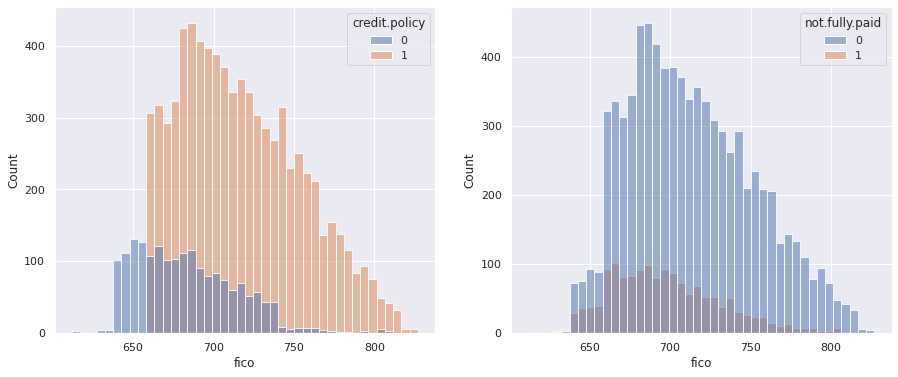

In [ ]:
fig, ax = plt.subplots(1,2, sharex=True, figsize=(15,6))
sns.histplot(data=df, x='fico', hue='credit.policy', ax=ax[0])
sns.histplot(data=df, x='fico', hue='not.fully.paid', ax=ax[1])

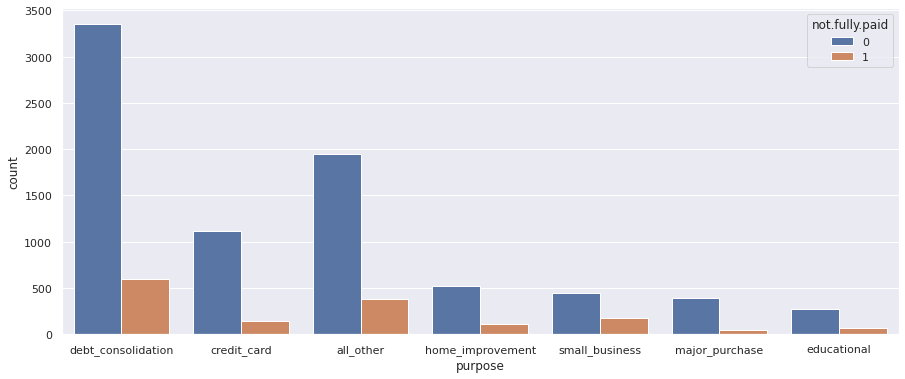

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(15,6))
sns.countplot(data=df, x='purpose', hue='not.fully.paid')

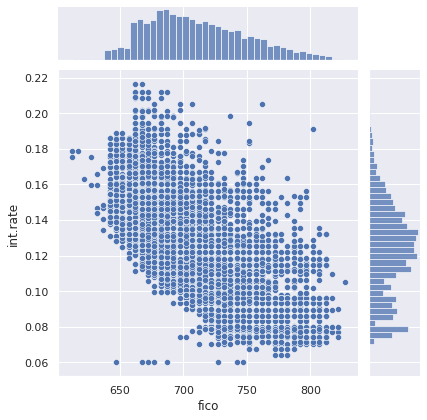

In [ ]:
sns.jointplot(data=df, x='fico', y='int.rate')

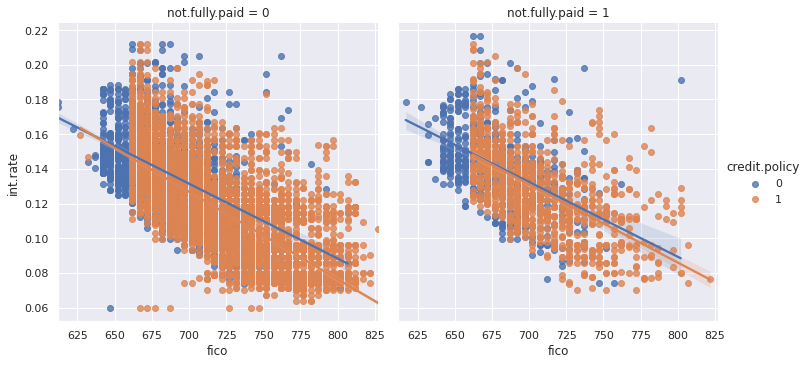

In [ ]:
sns.lmplot(data=df, x='fico', y='int.rate', hue='credit.policy', col='not.fully.paid')

## **Data Preparation**

In [ ]:
df_tfm=pd.get_dummies(df, columns=['purpose'], prefix='purpose', drop_first=True)

In [ ]:
X=df_tfm.drop('not.fully.paid', axis=1)
y=df_tfm['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## **Random Forest Classifier Algorithm**

In [ ]:
rfc=RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)
predicted=rfc.predict(X_test)

In [ ]:
pd.DataFrame(classification_report(y_test, predicted, output_dict=True)).transpose()

,precision,recall,f1-score,support
0,0.839490,0.994717,0.910535,2650.000000
1,0.333333,0.013699,0.026316,511.000000
accuracy,0.836128,0.836128,0.836128,0.836128
macro avg,0.586412,0.504208,0.468426,3161.000000
weighted avg,0.757666,0.836128,0.767594,3161.000000


In [ ]:
pd.DataFrame(confusion_matrix(y_test, predicted), columns=['Predicted Negative', 'Predicted Positive'], index=['True Negative', 'True Positive'])

,Predicted Negative,Predicted Positive
True Negative,2636,14
True Positive,504,7


## **Decision Tree Classifier Algorithm**

In [ ]:
rfc=DecisionTreeClassifier()
rfc.fit(X_train, y_train)
predicted=rfc.predict(X_test)

In [ ]:
pd.DataFrame(classification_report(y_test, predicted, output_dict=True)).transpose()

,precision,recall,f1-score,support
0,0.848634,0.844151,0.846387,2650.000000
1,0.213333,0.219178,0.216216,511.000000
accuracy,0.743119,0.743119,0.743119,0.743119
macro avg,0.530984,0.531665,0.531301,3161.000000
weighted avg,0.745933,0.743119,0.744515,3161.000000


In [ ]:
pd.DataFrame(confusion_matrix(y_test, predicted), columns=['Predicted Negative', 'Predicted Positive'], index=['True Negative', 'True Positive'])

,Predicted Negative,Predicted Positive
True Negative,2237,413
True Positive,399,112
